# Introdução ao pacote de inversão

## Regressão linear básica

In [2]:
import numpy as np

In [76]:
x = np.linspace(5, 20, 100)
a, b = 0.1, 500
y = a*x + b

In [77]:
type(x)

numpy.ndarray

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

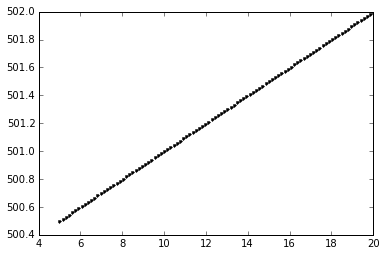

In [79]:
plt.plot(x, y, '.k')

In [80]:
from fatiando import utils

In [81]:
y_real = utils.contaminate(y, 0.2)

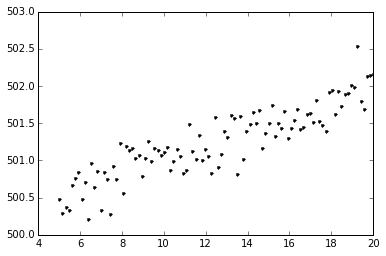

In [82]:
plt.plot(x, y_real, '.k')

In [83]:
from fatiando.inversion import Misfit

In [84]:
class Regressao(Misfit):
    
    def __init__(self, x, y):
        Misfit.__init__(self, data=y, nparams=2, islinear=True)
        self.x = x
        
    def predicted(self, p):
        a, b = p
        return a*self.x + b
    
    def jacobian(self, p):
        A = np.empty((self.ndata, self.nparams))
        A[:, 0] = self.x
        A[:, 1] = 1
        return A

In [85]:
reg = Regressao(x, y_real)

In [86]:
reg

In [87]:
reg.fit()

In [88]:
reg.estimate_

array([  9.59646698e-02,   5.00050442e+02])

In [89]:
reg.predicted()

array([ 500.53026498,  500.54480508,  500.55934518,  500.57388528,
        500.58842538,  500.60296548,  500.61750559,  500.63204569,
        500.64658579,  500.66112589,  500.67566599,  500.69020609,
        500.70474619,  500.7192863 ,  500.7338264 ,  500.7483665 ,
        500.7629066 ,  500.7774467 ,  500.7919868 ,  500.8065269 ,
        500.82106701,  500.83560711,  500.85014721,  500.86468731,
        500.87922741,  500.89376751,  500.90830761,  500.92284772,
        500.93738782,  500.95192792,  500.96646802,  500.98100812,
        500.99554822,  501.01008833,  501.02462843,  501.03916853,
        501.05370863,  501.06824873,  501.08278883,  501.09732893,
        501.11186904,  501.12640914,  501.14094924,  501.15548934,
        501.17002944,  501.18456954,  501.19910964,  501.21364975,
        501.22818985,  501.24272995,  501.25727005,  501.27181015,
        501.28635025,  501.30089036,  501.31543046,  501.32997056,
        501.34451066,  501.35905076,  501.37359086,  501.38813

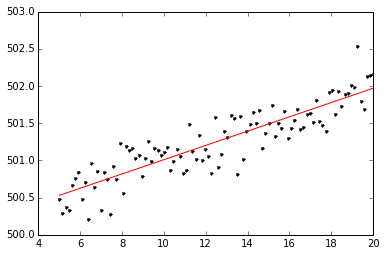

In [90]:
plt.plot(x, y_real, '.k')
plt.plot(x, reg.predicted(), '-r')

## Desafio: Implemente uma classe que faz o ajuste de uma parábola

In [98]:
a, b, c = 0.01, 0.1, 100
y2 = a*x**2 + b*x + c
y2_real = utils.contaminate(y2, 0.1)

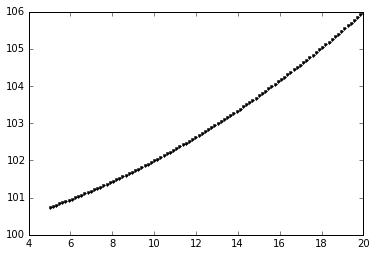

In [99]:
plt.plot(x, y2, '.k')

In [100]:
class Parabola(Misfit):
    
    def __init__(self, x, y):
        Misfit.__init__(self, data=y, nparams=3, islinear=False)
        self.x = x
        
    def predicted(self, p):
        a, b, c = p
        return a*self.x**2 + b*self.x + c
    
    def jacobian(self, p):
        A = np.empty((self.ndata, self.nparams))
        A[:, 0] = self.x**2
        A[:, 1] = self.x
        A[:, 2] = 1
        return A

In [101]:
par = Parabola(x, y2_real).fit()
par.estimate_

array([  1.00553473e-02,   1.02011235e-01,   9.99651528e+01])

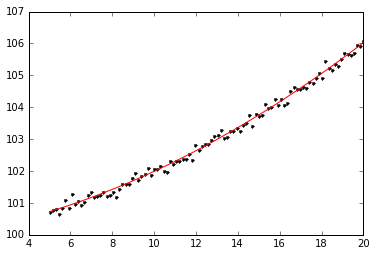

In [102]:
plt.plot(x, y2_real, '.k')
plt.plot(x, par.predicted(), '-r')